In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import cv2
import os
from glob import glob
import json
import os.path as osp
import sys
import math
import PIL.Image
import PIL.ImageDraw
import io


Using TensorFlow backend.


In [2]:
import sys
import matplotlib.pyplot as plt

In [3]:
sys.path.insert(0, 'A:\My Learning\Python\GL-PGPAIML\Capstone Project\Road_Damage\src')

In [5]:
# Import Project Library
from labelmeUtil import generateMaskImage
from dataset import roadDamageDataset as ds

In [6]:
input_dir=r"A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train"
output_dir=r"A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\output\train"

### Step 1 : Generate Mask image data from LabelMe Annotated JSON file

In [7]:
generateMaskImage(input_dir,output_dir)

Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_153128\Pictures0169_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_153128\Pictures0170_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_153128\Pictures0171_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_153128\Pictures0172_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_153128\Pictures0173_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_153128\Pictures0174_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\

Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_154439_anno2\Pictures0835_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_154439_anno2\Pictures0836_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_154439_anno2\Pictures0837_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_154439_anno2\Pictures0838_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_154439_anno2\Pictures0839_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_154439_anno2\Pictures0840_leftImg8bit.json
Processing

Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno1\Pictures1364_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno1\Pictures1365_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno1\Pictures1366_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno1\Pictures1367_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno1\Pictures1368_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno1\Pictures1369_leftImg8bit.json
Processing

Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno4\Pictures1414_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno4\Pictures1415_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno4\Pictures1416_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno4\Pictures1417_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno4\Pictures1418_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno4\Pictures1419_leftImg8bit.json
Processing

Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno6\Pictures1464_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno6\Pictures1465_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno6\Pictures1466_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno6\Pictures1467_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno6\Pictures1468_leftImg8bit.json
Processing File Name :  A:\My Learning\Python\GL-PGPAIML\Capstone Project\Data\release_version_v1\leftImg8bit\train/Annot_174335_anno6\Pictures1469_leftImg8bit.json
Processing

KeyError: 'wet'

### Step 2 : Get Road Damage Dataset (Input Data & Label Data)

In [8]:
data=ds(input_dir,output_dir)

In [9]:
img,lbl=data.load_data()

In [10]:
img.shape

(218, 1024, 2048, 3)

In [11]:
lbl.shape

(218, 1024, 2048)

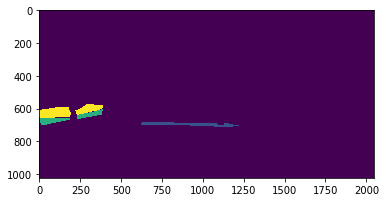

In [12]:
plt.imshow(lbl[0])

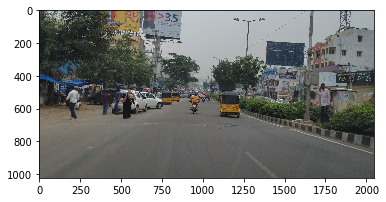

In [13]:
plt.imshow(img[0])